# Fine tuning
 
Previously, we've trained multiple models with pretty much the same data. We can also try some additional textprocessing such as  

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt

# Load train and test data
train_data = pd.read_csv("../data/train_data.csv")
test_data = pd.read_csv("../data/test_data.csv")

print(train_data.head())

# Split train and test data into features and targets
train_features = train_data["lyrics"]
train_targets = train_data["most_common_genre"]

test_features = test_data["lyrics"]
test_targets = test_data["most_common_genre"]

categories=list(train_targets.unique())

def model_summary(model):
    print("Model summary:")
    print("---------------------------")
    total_params = 0
    for name, param in model.named_parameters():
        param_count = param.numel()
        total_params += param_count
    print(f"Total parameters: {total_params}")
    
def print_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=categories)
    print(report)
    sns.heatmap(cm, annot=True, xticklabels=categories, yticklabels=categories, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

                       id                                             lyrics  \
0  1FAmKoufyAXMfzPPs9bsjA  i tied my bandana took my pack from the floor ...   
1  3QvPEv8XjHa73iYhaienWw  i want to live on the moon never see a human a...   
2  5VPFATm85G3P04Q5g8yxqr  bitch you know you can t parallel park anyway ...   
3  7J2jCftItt7htcOUdcMnpt  graceless falling slipping in the cold with no...   
4  4cBPzVIbDIQx0LIyauFAy0  madame morse estate stood five hundred years p...   

       artist_name most_common_genre  \
0  Waylon Jennings           country   
1   Phantom Planet              rock   
2    Isaiah Rashad           hip-hop   
3     Matt Pond PA             indie   
4       Ariel Pink               pop   

                                          genre_list  
0  ['country', 'country', 'rock', 'outlaw', 'coun...  
1                                    ['pop', 'rock']  
2  ['hip-hop', 'rap', 'tennessee', 'hip-hop', 'un...  
3                                ['philly', 'indie']  
4  

In [16]:
def contractions(s):
    s = re.sub(r"won't", "will not",s)
    s = re.sub(r"would't", "would not",s)
    s = re.sub(r"could't", "could not",s)
    s = re.sub(r"\'d", " would",s)
    s = re.sub(r"can\'t", "can not",s)
    s = re.sub(r"n\'t", " not", s)
    s = re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    return s
train_features = train_features.apply(lambda x:contractions(x))
test_features = test_features.apply(lambda x:contractions(x))

              precision    recall  f1-score   support

     country       0.57      0.45      0.50       265
        rock       0.50      0.49      0.50       436
     hip-hop       0.43      0.52      0.47       398
       indie       0.43      0.11      0.18       493
         pop       0.60      0.55      0.57       414
         rap       0.38      0.59      0.46       919
   christian       0.33      0.02      0.03       217
       metal       0.49      0.62      0.55       313
        punk       0.47      0.53      0.50      1113
        soul       0.41      0.13      0.20       195

    accuracy                           0.46      4763
   macro avg       0.46      0.40      0.40      4763
weighted avg       0.46      0.46      0.43      4763



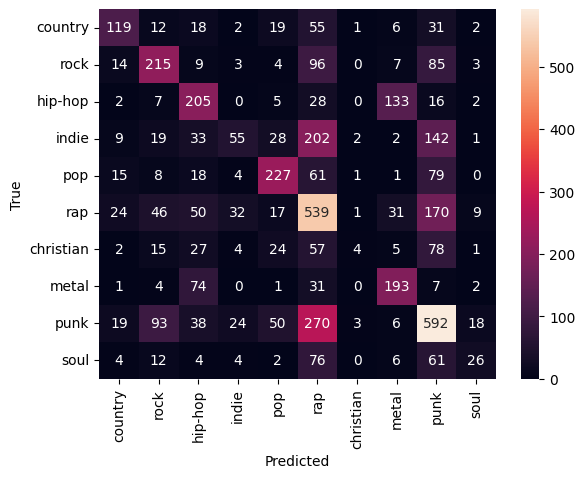

In [17]:
vectorizer = TfidfVectorizer(ngram_range=(1,5))
vectors_train = vectorizer.fit_transform(train_features)
vectors_test = vectorizer.transform(test_features)
print(vectors_train.shape, vectors_test.shape)

clf = LinearSVC()

clf.fit(vectors_train, train_targets)
pred = clf.predict(vectors_test)
print_report(test_targets, pred)

In [45]:
train_targets.iloc[0]

'country'

In [46]:
clf.predict(vectorizer.transform([train_features.iloc[0]]))

array(['country'], dtype=object)

In [59]:
from nltk.stem import WordNetLemmatizer
import nltk
lemmatizer = WordNetLemmatizer()

# Split train and test data into features and targets
train_features = train_data["lyrics"]
train_targets = train_data["most_common_genre"]

test_features = test_data["lyrics"]
test_targets = test_data["most_common_genre"]

train_features = train_features.apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
test_features = test_features.apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

(19052, 10181830) (4763, 10181830)
              precision    recall  f1-score   support

     country       0.57      0.44      0.49       265
        rock       0.49      0.49      0.49       436
     hip-hop       0.44      0.53      0.48       398
       indie       0.39      0.10      0.16       493
         pop       0.61      0.56      0.58       414
         rap       0.37      0.57      0.45       919
   christian       0.46      0.03      0.05       217
       metal       0.51      0.61      0.55       313
        punk       0.46      0.53      0.49      1113
        soul       0.43      0.13      0.20       195

    accuracy                           0.45      4763
   macro avg       0.47      0.40      0.39      4763
weighted avg       0.46      0.45      0.43      4763



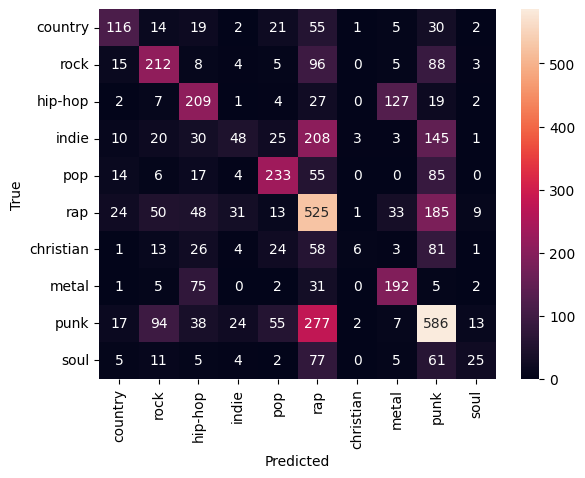

In [60]:
vectorizer = TfidfVectorizer(ngram_range=(1,5))
vectors_train = vectorizer.fit_transform(train_features)
vectors_test = vectorizer.transform(test_features)
print(vectors_train.shape, vectors_test.shape)

clf = LinearSVC()

clf.fit(vectors_train, train_targets)
pred = clf.predict(vectors_test)
print_report(test_targets, pred)

              precision    recall  f1-score   support

     country       0.55      0.49      0.52       265
        rock       0.46      0.47      0.47       436
     hip-hop       0.47      0.52      0.49       398
       indie       0.32      0.09      0.13       493
         pop       0.59      0.55      0.57       414
         rap       0.39      0.58      0.46       919
   christian       0.33      0.02      0.04       217
       metal       0.50      0.61      0.55       313
        punk       0.44      0.50      0.47      1113
        soul       0.33      0.15      0.21       195

    accuracy                           0.45      4763
   macro avg       0.44      0.40      0.39      4763
weighted avg       0.44      0.45      0.42      4763



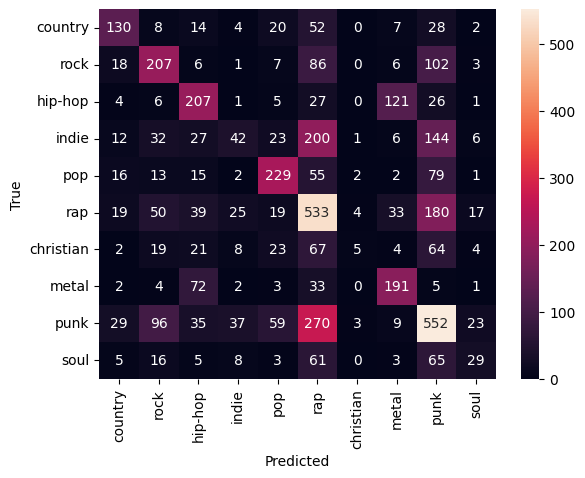

In [57]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Split train and test data into features and targets
train_features = train_data["lyrics"]
train_targets = train_data["most_common_genre"]

test_features = test_data["lyrics"]
test_targets = test_data["most_common_genre"]

train_features = train_features.apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
test_features = test_features.apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

vectorizer = TfidfVectorizer(ngram_range=(1,5))
vectors_train = vectorizer.fit_transform(train_features)
vectors_test = vectorizer.transform(test_features)
print(vectors_train.shape, vectors_test.shape)

clf = LinearSVC()

clf.fit(vectors_train, train_targets)
pred = clf.predict(vectors_test)
print_report(test_targets, pred)

## All of it together

(19052, 6773026) (4763, 6773026)
              precision    recall  f1-score   support

     country       0.55      0.47      0.51       265
        rock       0.44      0.44      0.44       436
     hip-hop       0.47      0.54      0.50       398
       indie       0.35      0.09      0.14       493
         pop       0.57      0.56      0.57       414
         rap       0.38      0.56      0.45       919
   christian       0.31      0.02      0.04       217
       metal       0.51      0.61      0.55       313
        punk       0.43      0.50      0.46      1113
        soul       0.37      0.16      0.22       195

    accuracy                           0.44      4763
   macro avg       0.44      0.40      0.39      4763
weighted avg       0.43      0.44      0.42      4763



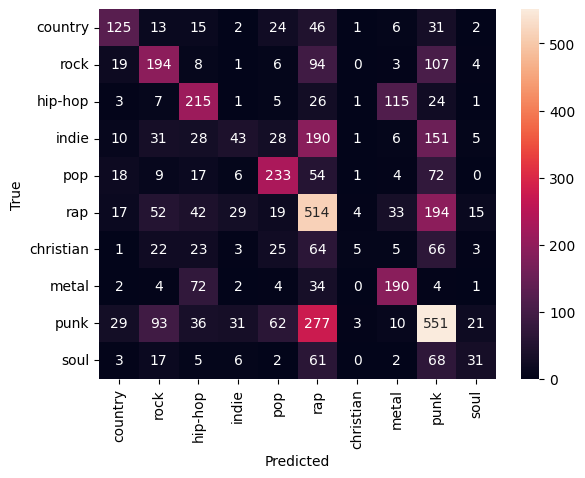

In [58]:
train_features = train_data["lyrics"]
train_targets = train_data["most_common_genre"]

test_features = test_data["lyrics"]
test_targets = test_data["most_common_genre"]

train_features = train_features.apply(lambda x:contractions(x))
test_features = test_features.apply(lambda x:contractions(x))

train_features = train_features.apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
test_features = test_features.apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

train_features = train_features.apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
test_features = test_features.apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

vectorizer = TfidfVectorizer(ngram_range=(1,5))
vectors_train = vectorizer.fit_transform(train_features)
vectors_test = vectorizer.transform(test_features)
print(vectors_train.shape, vectors_test.shape)

clf = LinearSVC()

clf.fit(vectors_train, train_targets)
pred = clf.predict(vectors_test)
print_report(test_targets, pred)

## Another contractions fix

(19052, 10297613) (4763, 10297613)
              precision    recall  f1-score   support

     country       0.57      0.45      0.50       265
        rock       0.50      0.49      0.50       436
     hip-hop       0.42      0.51      0.46       398
       indie       0.42      0.11      0.17       493
         pop       0.61      0.55      0.58       414
         rap       0.38      0.59      0.46       919
   christian       0.29      0.02      0.03       217
       metal       0.49      0.62      0.55       313
        punk       0.47      0.53      0.50      1113
        soul       0.38      0.13      0.19       195

    accuracy                           0.45      4763
   macro avg       0.45      0.40      0.39      4763
weighted avg       0.45      0.45      0.43      4763



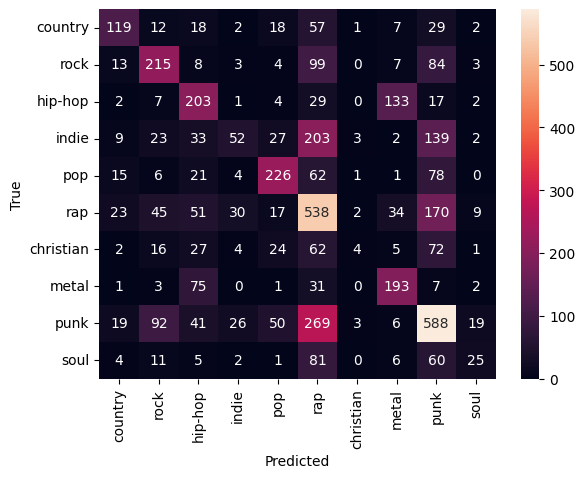

In [3]:
import contractions

train_features = train_data["lyrics"]
train_targets = train_data["most_common_genre"]

test_features = test_data["lyrics"]
test_targets = test_data["most_common_genre"]

train_features = train_features.apply(lambda x:contractions.fix(x))
test_features = test_features.apply(lambda x:contractions.fix(x))

vectorizer = TfidfVectorizer(ngram_range=(1,5))
vectors_train = vectorizer.fit_transform(train_features)
vectors_test = vectorizer.transform(test_features)
print(vectors_train.shape, vectors_test.shape)

clf = LinearSVC()

clf.fit(vectors_train, train_targets)
pred = clf.predict(vectors_test)
print_report(test_targets, pred)